In [1]:
from fastai import *
from fastai.basics import *
from fastai.vision import *

In [2]:
from IPython.display import Image

In [3]:
import warnings; warnings.simplefilter('ignore')

In [4]:
folder1 = 'ballet'
#file1 = 'urls-ballet.txt'

In [5]:
path = Path('data/exercise')
#dest1 = path/folder1
#dest1.mkdir(parents=True, exist_ok=True)

In [6]:
#download_images(path/file1, dest1, max_pics=200)

In [7]:
folder2 = 'soccer'
#file2 = 'urls-soccer.txt'

In [8]:
#path = Path('data/exercise')
#dest2 = path/folder2
#dest2.mkdir(parents=True, exist_ok=True)

In [9]:
#download_images(path/file2, dest2, max_pics=200)

In [10]:
classes = ['ballet','soccer']

In [11]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

ballet


soccer


In [12]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [13]:
data.classes

['ballet', 'soccer']

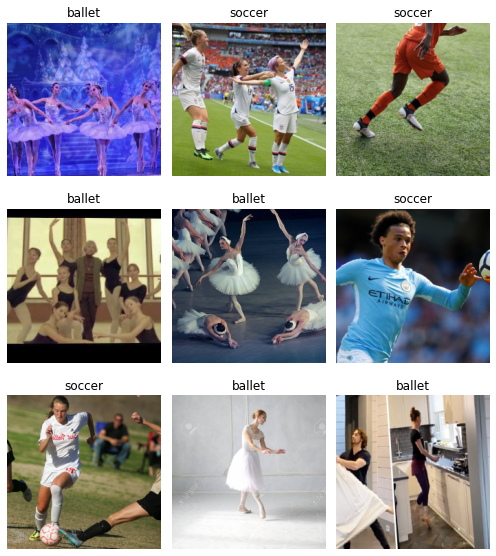

In [14]:
data.show_batch(rows=3, figsize = (7,8))

In [15]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ballet', 'soccer'], 2, 164, 41)

In [16]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


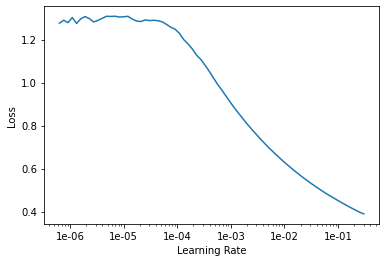

In [18]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(3, max_lr=5e-4)

epoch,train_loss,valid_loss,error_rate,time
0,1.245896,1.211799,0.390244,00:40
1,1.069755,0.548782,0.243902,00:40
2,0.879633,0.311367,0.195122,00:45


In [21]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

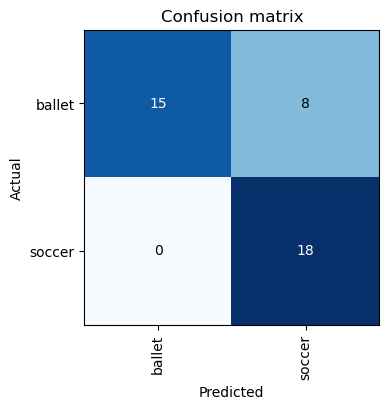

In [22]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=100)

In [23]:
losses,idxs = interp.top_losses(2)
for p in data.valid_ds.x.items[idxs]:
    print(p)

data\exercise\ballet\00000163.jpg
data\exercise\ballet\00000176.jpg


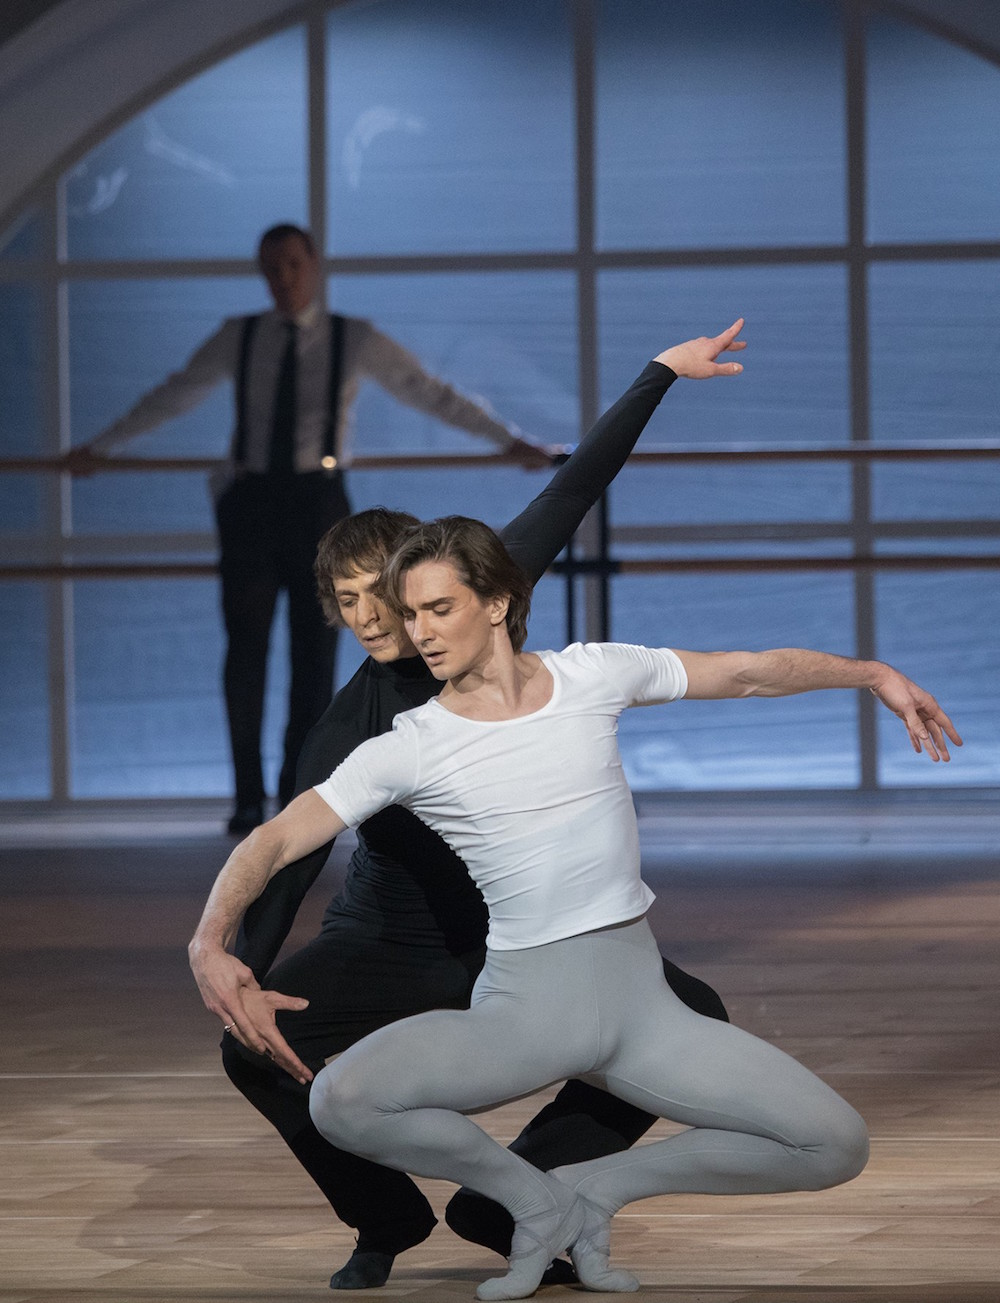

In [24]:
# This image was incorrectly classified as soccer
Image(filename=data.valid_ds.x.items[idxs][0],width=300)

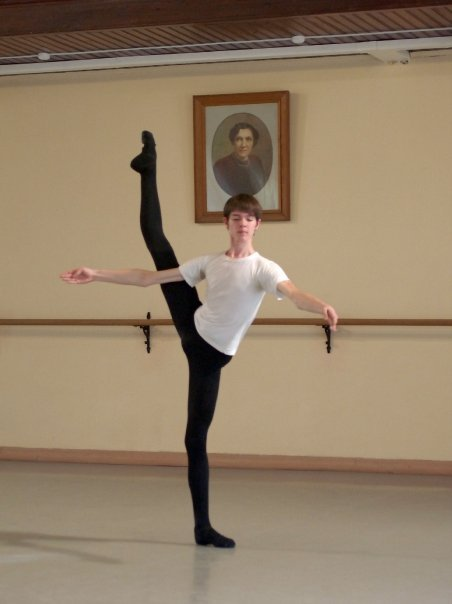

In [25]:
# This image was incorrectly classified as soccer
Image(filename=data.valid_ds.x.items[idxs][1],width=300)